IMPORTING AND VISUALIZING DATA

In [35]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt            #Visualization
import seaborn as sns                      #Visualization
import os
import klib
%matplotlib inline

In [36]:
data = pd.read_csv("/Users/sys1/Documents/ISH/internships/Inspire'23/DATA/3M data TSJ.csv")
data = data.iloc[:, :-1]
data

,TLC no:,TLC Start Date,Life on the day of report,Maturity(%),Last Scan Date,Days after last scan,Result,Plan scan freq. (days),Trips on prev. day of report date,HM Throughput(Kt),...,THERMAL_IMAGING_B,THERMAL_IMAGING_C,THERMAL_IMAGING_D,THERMAL_IMAGING_E,THERMAL_IMAGING_F,THERMAL_IMAGING_G,THERMAL_IMAGING_H,THERMAL_IMAGING_I,THERMAL_IMAGING_J,THERMAL_IMAGING_CONDITION
0,1.0,13-05-22,746,43.9,01-03-23,0.0,NORM,2.0,4.0,138.7,...,154.0,172.0,171.0,0.0,194.0,157.0,174.0,169.0,0.0,NORMAL
1,2.0,25-01-23,19,1.1,01-03-23,0.0,NORM,2.0,3.0,3.2,...,190.0,226.0,225.0,0.0,230.0,191.0,224.0,220.0,0.0,NORMAL
2,3.0,07-09-22,473,27.8,28-02-23,1.0,NORM,2.0,2.0,85.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,26-10-22,366,21.5,01-03-23,0.0,NORM,2.0,3.0,66.7,...,161.0,170.0,171.0,0.0,198.0,171.0,185.0,185.0,0.0,NORMAL
4,5.0,22-01-23,112,6.6,01-03-23,0.0,NORM,2.0,4.0,16.1,...,158.0,178.0,176.0,0.0,208.0,172.0,188.0,188.0,0.0,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,44.0,03-07-22,1283,67.5,7-Jun-23,0.0,NORM,2.0,3.0,340.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4745,45.0,09-02-21,1843,97.0,6-Jun-23,1.0,NORM,2.0,2.0,503.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4746,46.0,03-18-23,238,12.5,7-Jun-23,0.0,NORM,2.0,1.0,61.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4747,47.0,02-27-22,1361,71.6,7-Jun-23,0.0,NORM,2.0,3.0,371.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Dimensions of the dataset

data.shape

(4749, 32)

In [38]:
# Types of data in the dataset

data.dtypes

TLC no:                              float64
TLC Start Date                        object
Life on the day of report             object
Maturity(%)                          float64
Last Scan Date                        object
Days after last scan                 float64
Result                                object
Plan scan freq. (days)               float64
Trips on prev. day of report date    float64
HM Throughput(Kt)                    float64
Fill Qnty per trip                   float64
Fce. Circuit                          object
Last Tare wt.                        float64
Last Repair Date                      object
Plan repair freq.(days)              float64
Compliance(%) IR Scan                float64
Compliance(%) Repair                 float64
Report Date                           object
Average temp.                        float64
Timestamp                             object
SEQ_no:                              float64
THERMAL_IMAGING_A                    float64
THERMAL_IM

DATA PREPROCESSING

GridSpec(6, 6)

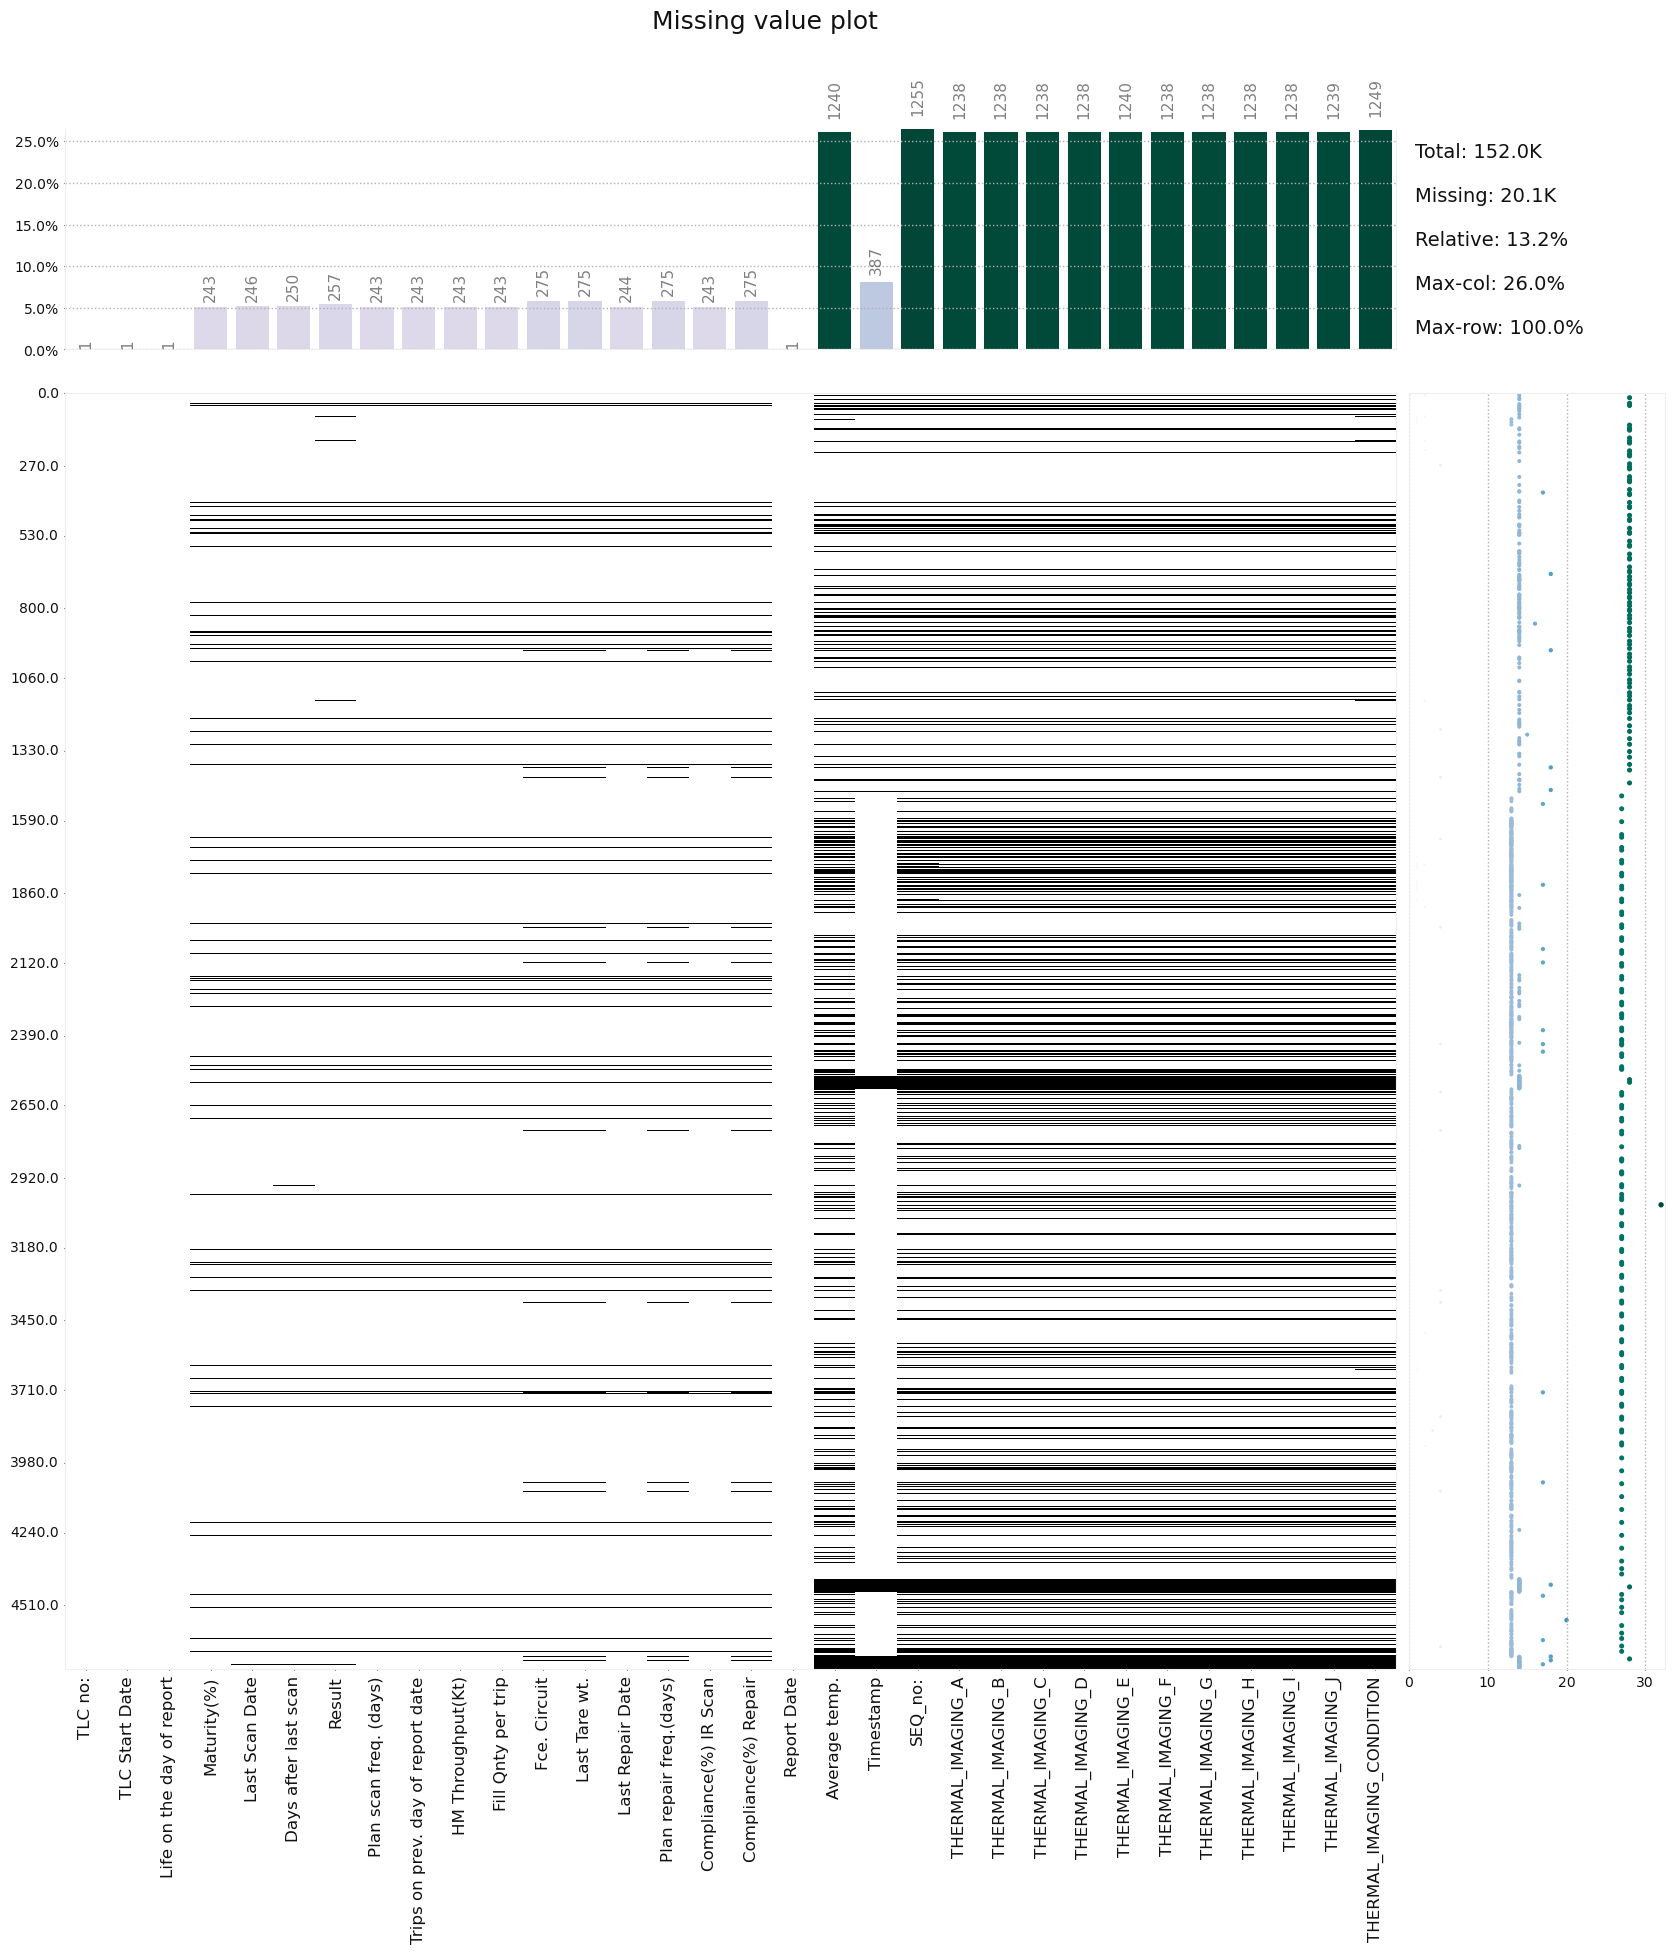

In [39]:
# Checking for missing values

klib.missingval_plot(data)

In [40]:
# Sum of the missing values in each column

missing_values_count = data.isnull().sum()
missing_values_count

TLC no:                                 1
TLC Start Date                          1
Life on the day of report               1
Maturity(%)                           243
Last Scan Date                        246
Days after last scan                  250
Result                                257
Plan scan freq. (days)                243
Trips on prev. day of report date     243
HM Throughput(Kt)                     243
Fill Qnty per trip                    243
Fce. Circuit                          275
Last Tare wt.                         275
Last Repair Date                      244
Plan repair freq.(days)               275
Compliance(%) IR Scan                 243
Compliance(%) Repair                  275
Report Date                             1
Average temp.                        1240
Timestamp                             387
SEQ_no:                              1255
THERMAL_IMAGING_A                    1238
THERMAL_IMAGING_B                    1238
THERMAL_IMAGING_C                 

In [41]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

13.208701831964625


In [42]:
# Sum of missing values in the dataset

data.isnull().sum().sum()

20073

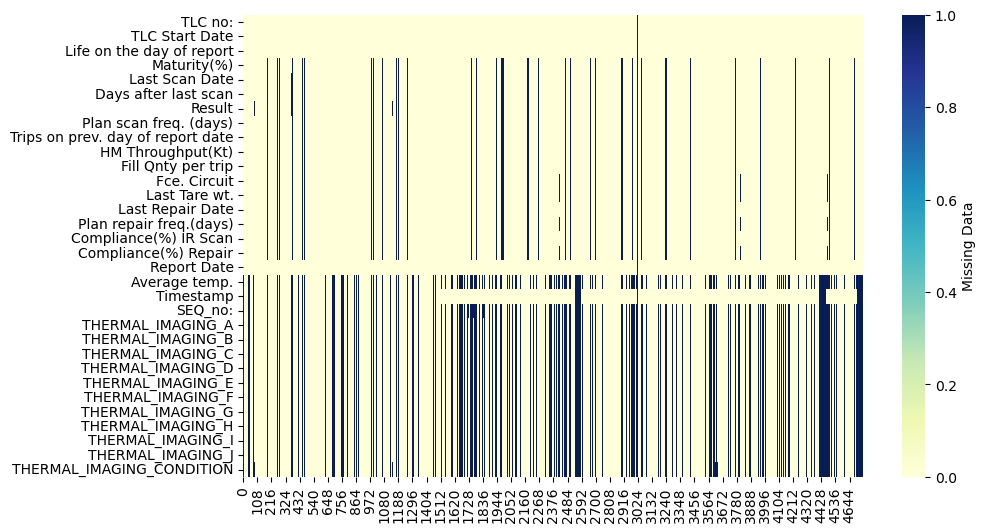

In [43]:
# Visualizing missing values using a heatmp

plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

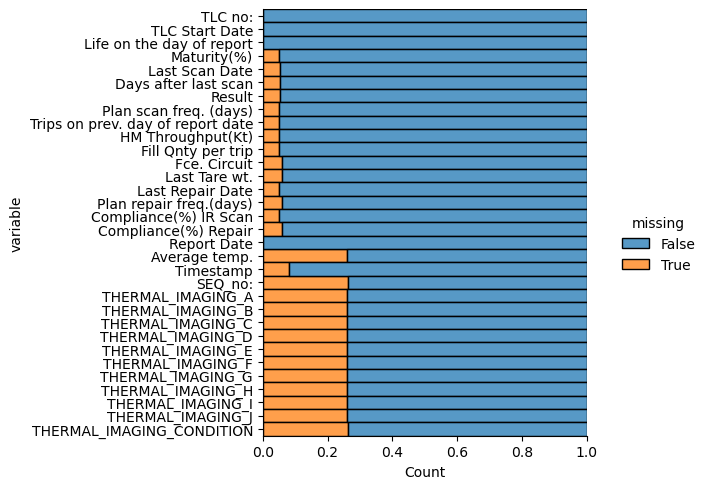

In [44]:
# Visualizing missing values using a barplot

plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [45]:
# Dropping all the missing values as they are random

data = data.dropna()

In [46]:
# New Dimensions of the dataset

data.shape

(3439, 32)

<Figure size 1000x600 with 0 Axes>

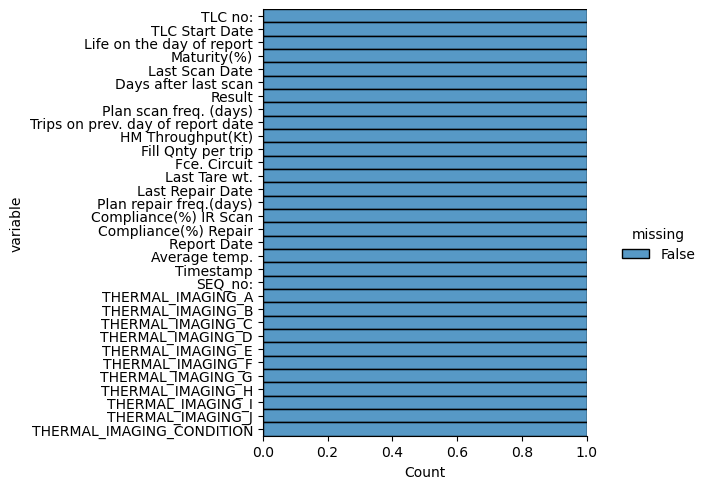

In [47]:
# Visualizing missing values using a barplot

plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [48]:
# Brief info of data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 4696
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TLC no:                            3439 non-null   float64
 1   TLC Start Date                     3439 non-null   object 
 2   Life on the day of report          3439 non-null   object 
 3   Maturity(%)                        3439 non-null   float64
 4   Last Scan Date                     3439 non-null   object 
 5   Days after last scan               3439 non-null   float64
 6   Result                             3439 non-null   object 
 7   Plan scan freq. (days)             3439 non-null   float64
 8   Trips on prev. day of report date  3439 non-null   float64
 9   HM Throughput(Kt)                  3439 non-null   float64
 10  Fill Qnty per trip                 3439 non-null   float64
 11  Fce. Circuit                       3439 non-null   objec

EXPLORATORY DATA ANALYSIS

GridSpec(6, 9)

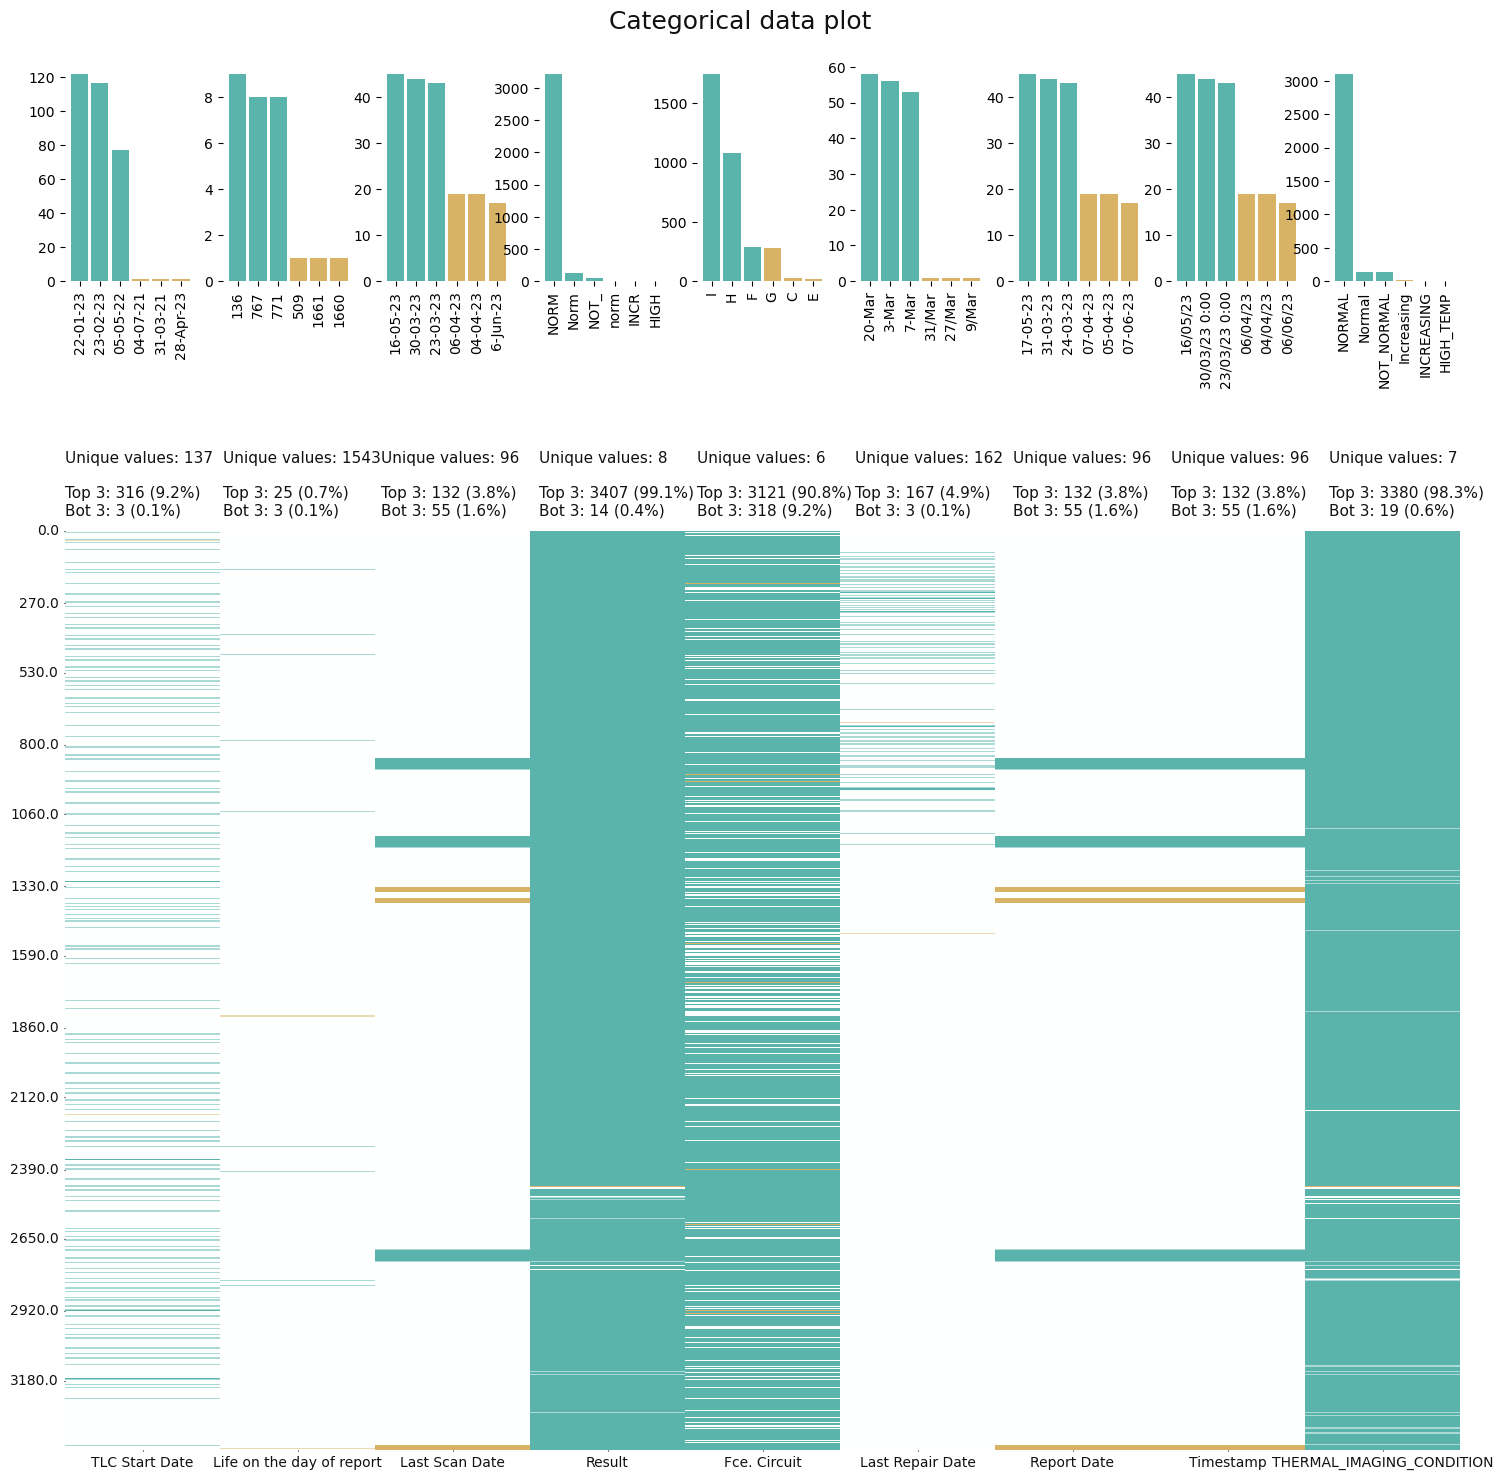

In [49]:
# Categorical data plot

klib.cat_plot(data)

In [50]:
# Correlation matrix plot using klib

klib.corr_mat(data)

,TLC no:,Maturity(%),Days after last scan,Plan scan freq. (days),Trips on prev. day of report date,HM Throughput(Kt),Fill Qnty per trip,Last Tare wt.,Plan repair freq.(days),Compliance(%) IR Scan,Compliance(%) Repair,Average temp.,SEQ_no:,THERMAL_IMAGING_A,THERMAL_IMAGING_B,THERMAL_IMAGING_C,THERMAL_IMAGING_D,THERMAL_IMAGING_E,THERMAL_IMAGING_F,THERMAL_IMAGING_G,THERMAL_IMAGING_H,THERMAL_IMAGING_I,THERMAL_IMAGING_J
TLC no:,1.00,-0.12,-,-,0.10,0.15,0.73,0.74,0.05,-,0.01,0.28,0.03,0.25,0.16,0.24,0.14,-,0.32,0.21,0.26,0.26,-
Maturity(%),-0.12,1.00,-,-,-0.02,0.90,-0.04,-0.24,-0.91,-,-0.05,-0.08,-0.01,-0.29,0.01,-0.03,-0.02,-,-0.21,0.03,-0.02,-0.03,-
Days after last scan,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Plan scan freq. (days),-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Trips on prev. day of report date,0.10,-0.02,-,-,1.00,0.03,0.15,0.11,-0.00,-,0.01,0.13,-0.11,0.11,0.06,0.10,0.04,-,0.15,0.14,0.15,0.15,-
HM Throughput(Kt),0.15,0.90,-,-,0.03,1.00,0.35,0.14,-0.84,-,-0.03,0.05,-0.00,-0.16,0.08,0.09,0.05,-,-0.08,0.13,0.09,0.08,-
Fill Qnty per trip,0.73,-0.04,-,-,0.15,0.35,1.00,0.94,-0.02,-,0.03,0.33,0.01,0.25,0.20,0.31,0.17,-,0.31,0.31,0.33,0.33,-
Last Tare wt.,0.74,-0.24,-,-,0.11,0.14,0.94,1.00,0.18,-,0.03,0.33,0.04,0.29,0.18,0.31,0.16,-,0.32,0.27,0.31,0.32,-
Plan repair freq.(days),0.05,-0.91,-,-,-0.00,-0.84,-0.02,0.18,1.00,-,0.08,0.04,0.04,0.23,-0.01,0.02,-0.00,-,0.13,-0.04,-0.00,0.01,-
Compliance(%) IR Scan,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


<Axes: title={'center': 'Feature-correlation (pearson)'}>

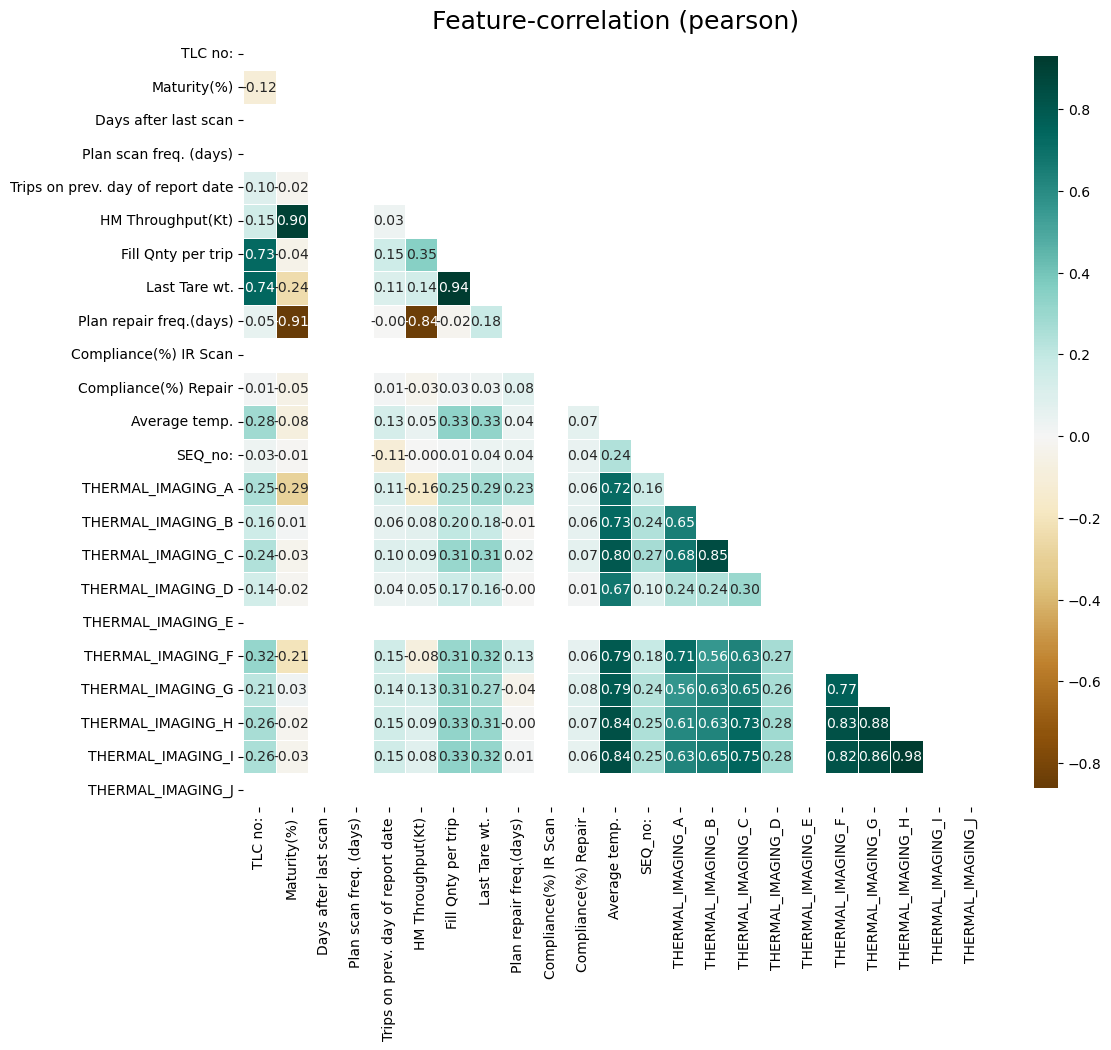

In [51]:
# Pearson correlation plot

klib.corr_plot(data)

/var/folders/r1/wtdlx40s1dbflxt51nxdl3zr0000gn/T/ipykernel_9880/608413491.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


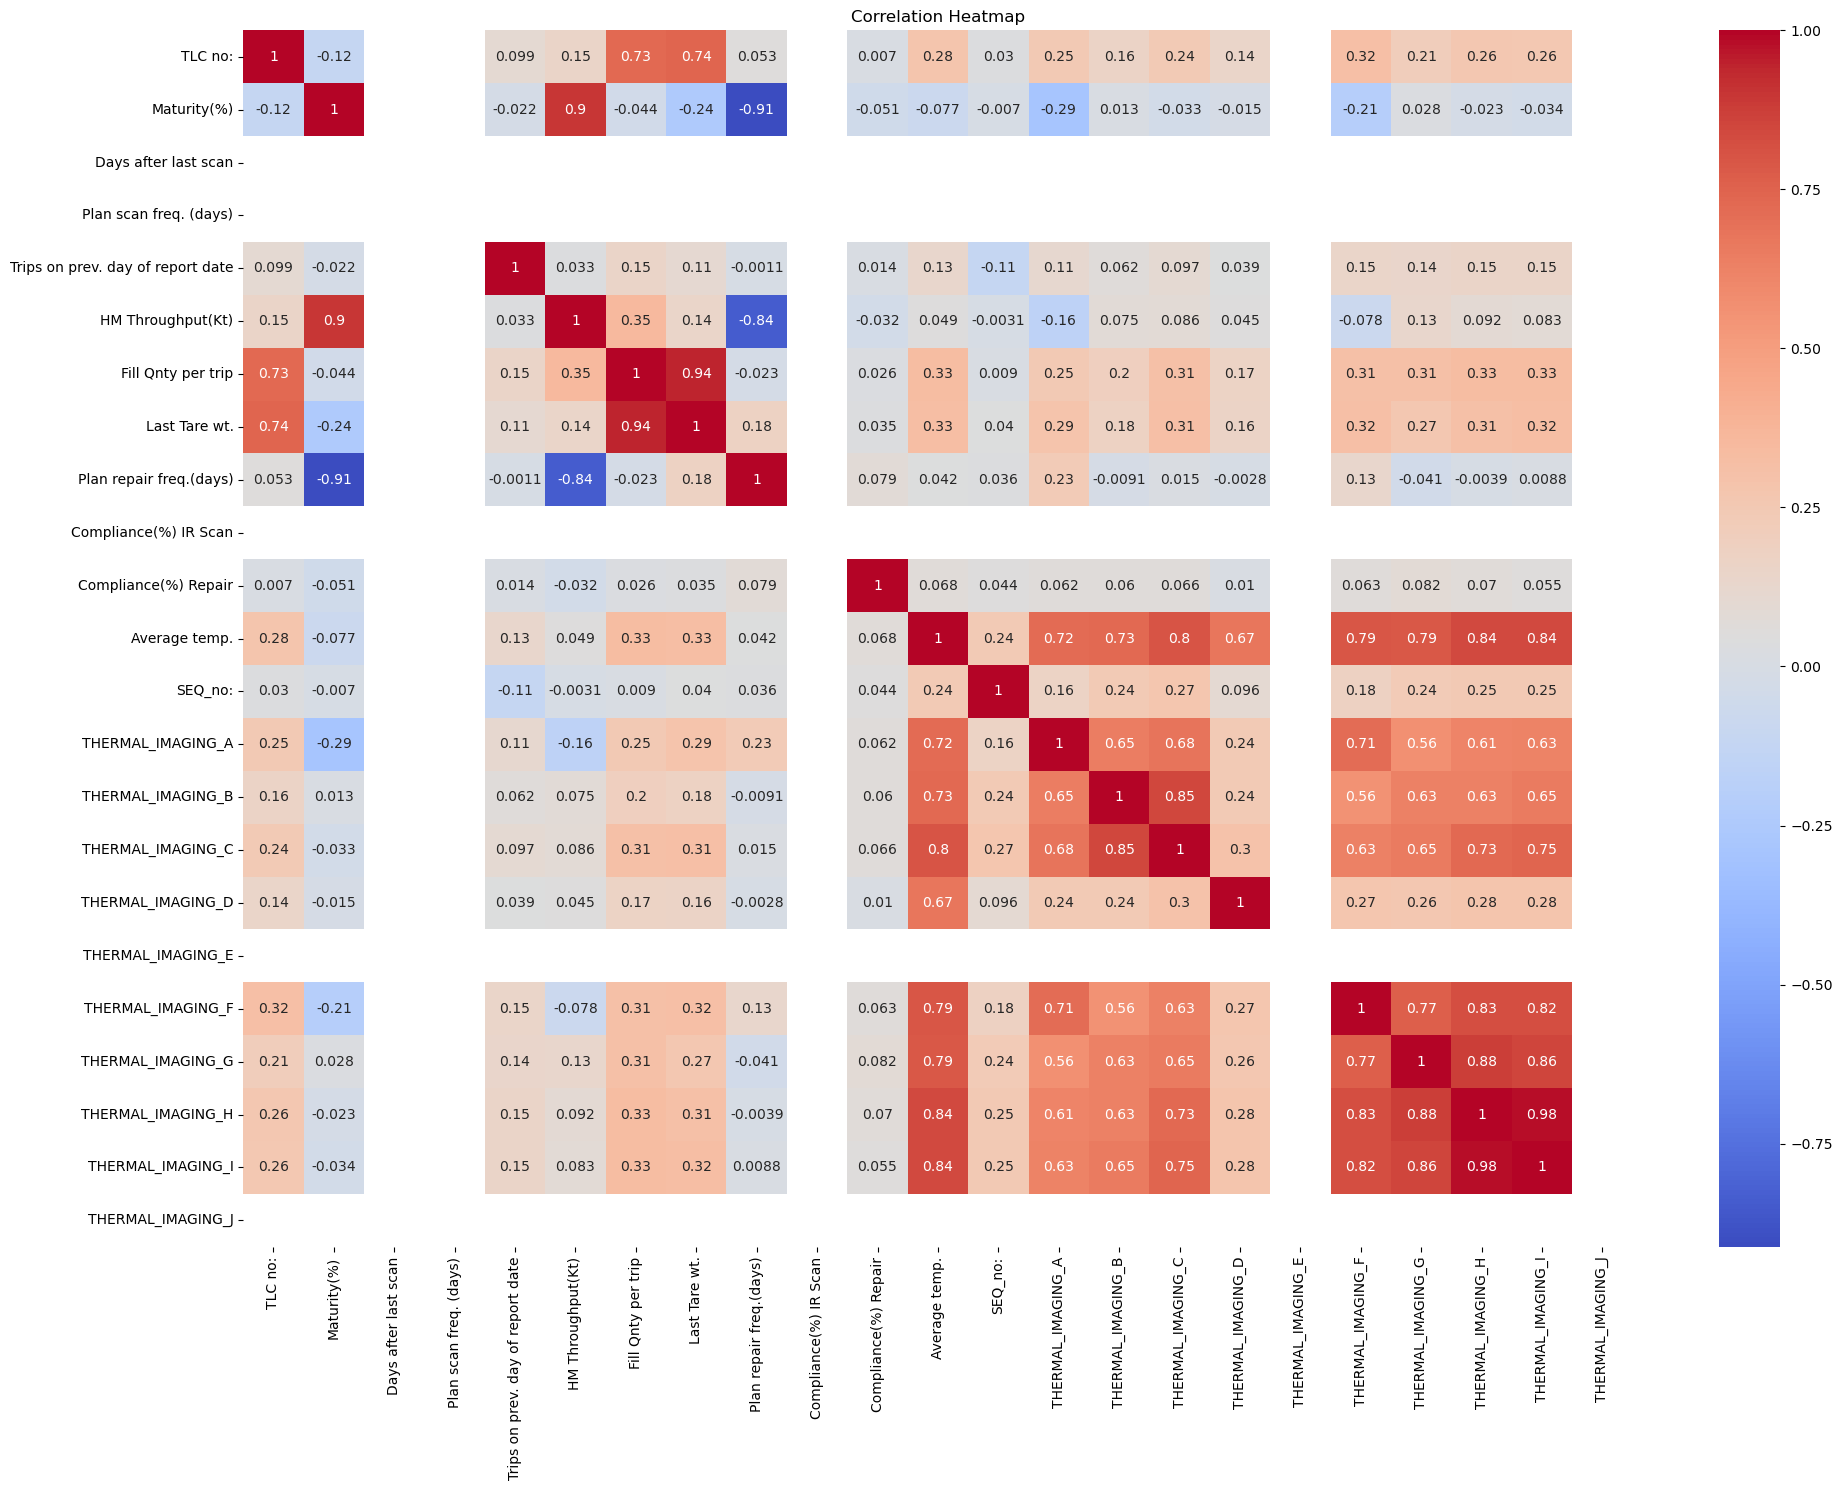

In [52]:
# Correlation using seaborn library

correlation_matrix = data.corr()

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 15))

# Plot the correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Adjust the layout to prevent the top and bottom of the heatmap from being cut off
plt.tight_layout()
plt.show()

<Axes: xlabel='THERMAL_IMAGING_I', ylabel='Density'>

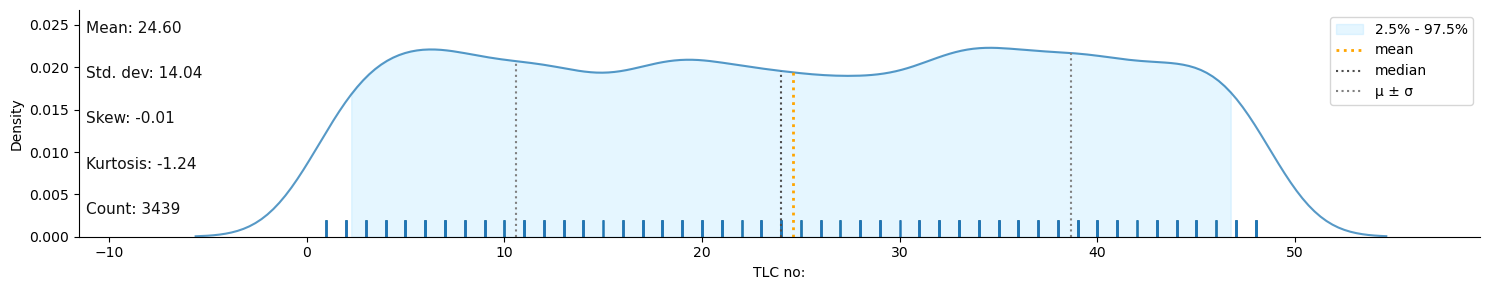

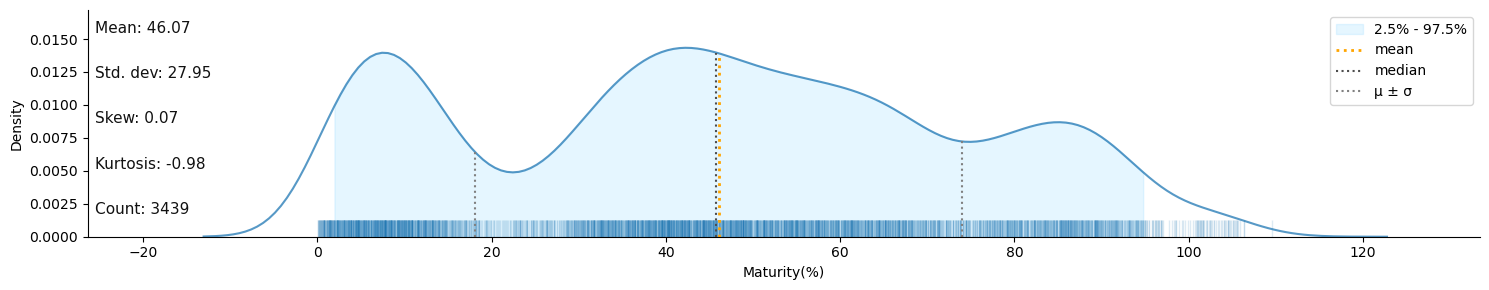

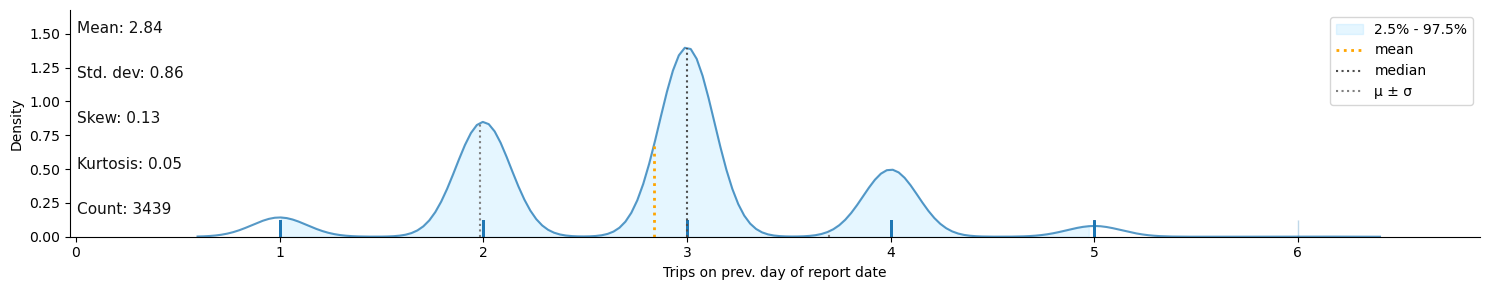

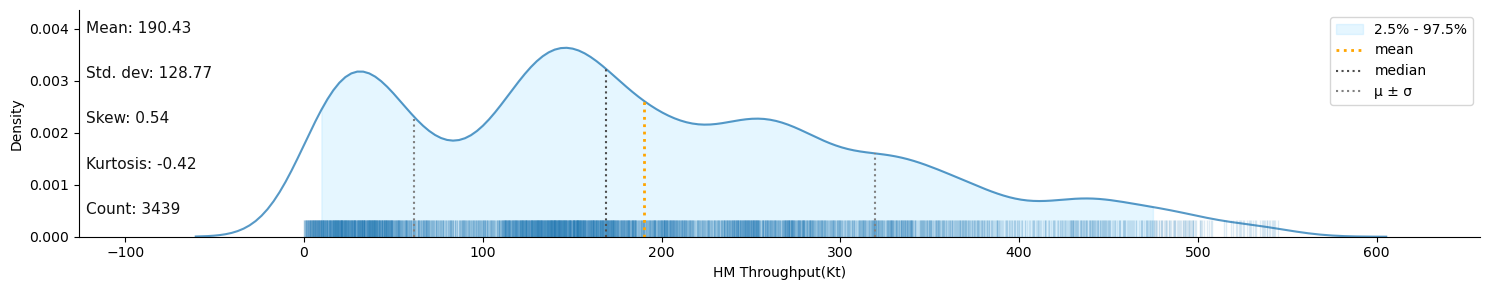

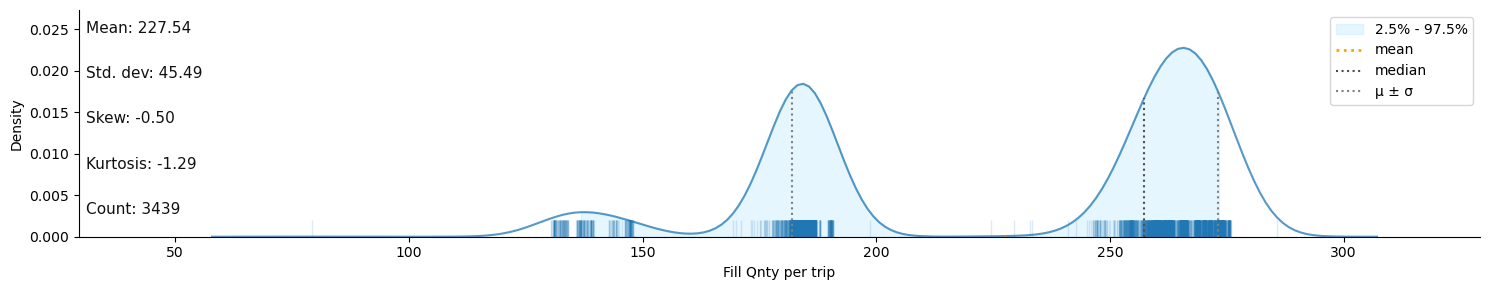

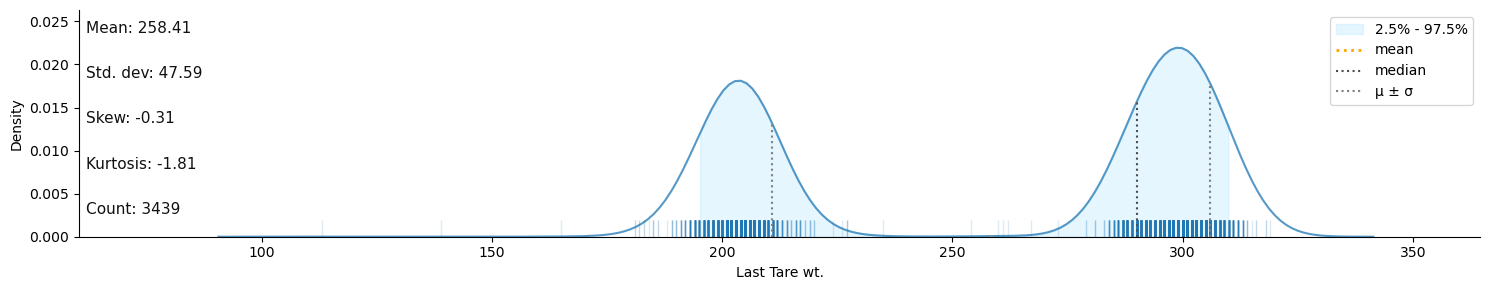

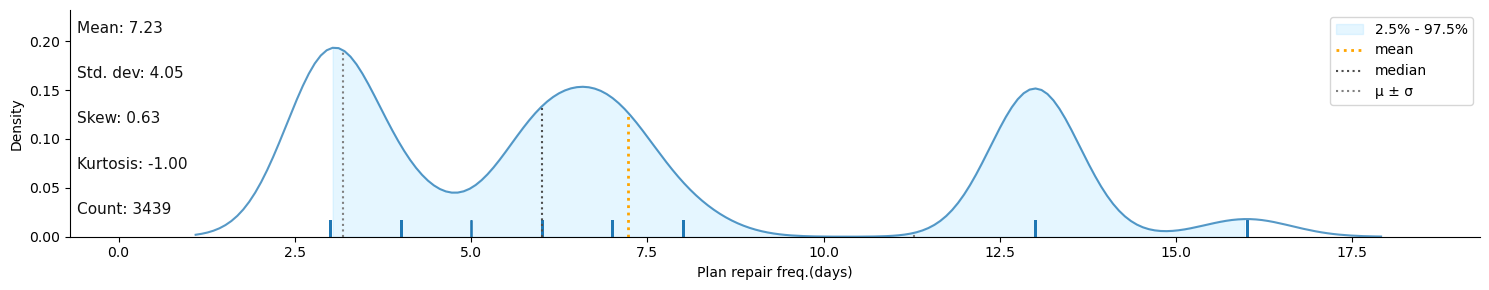

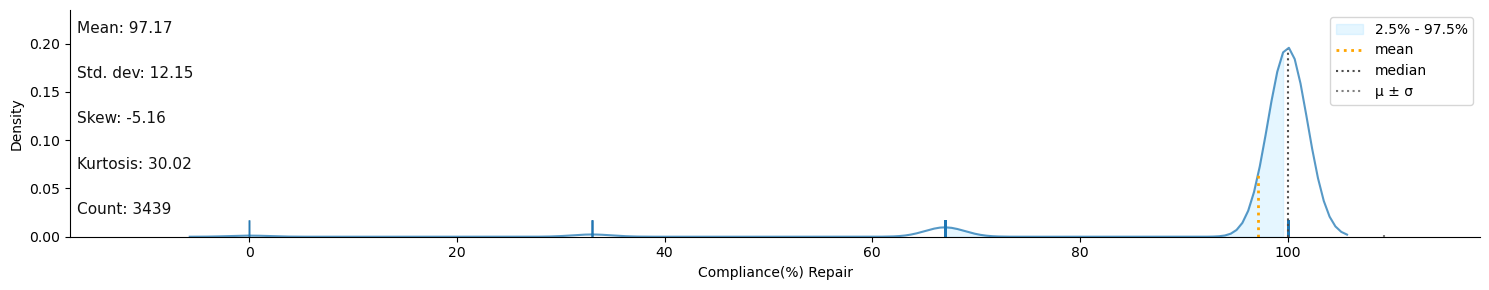

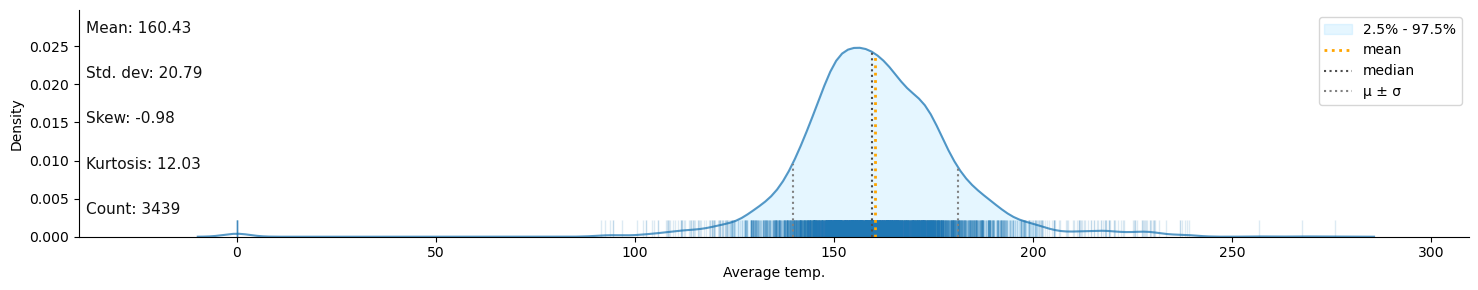

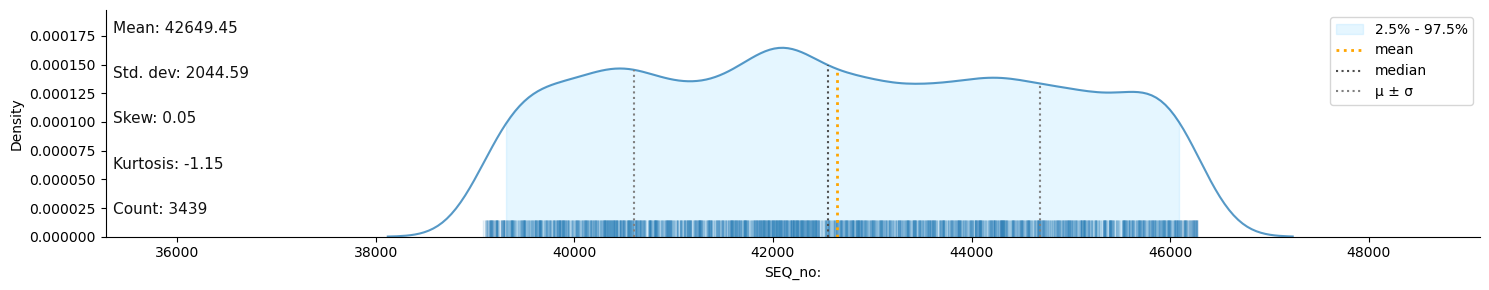

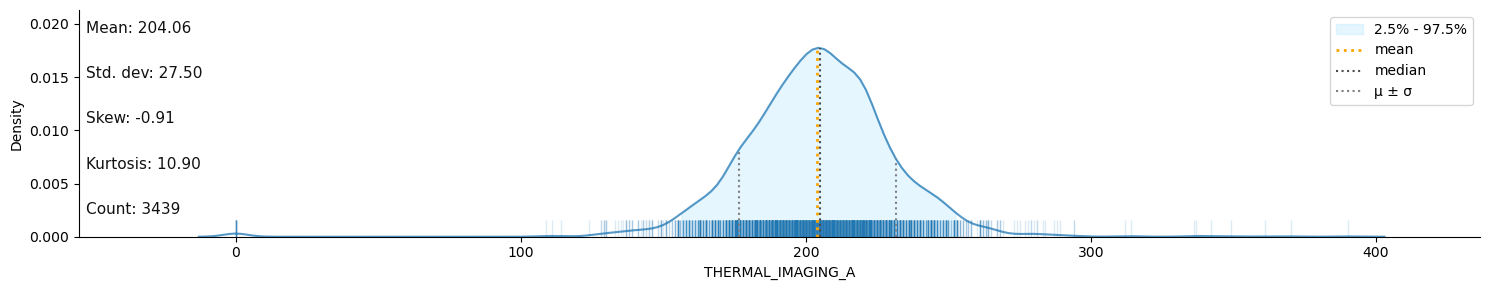

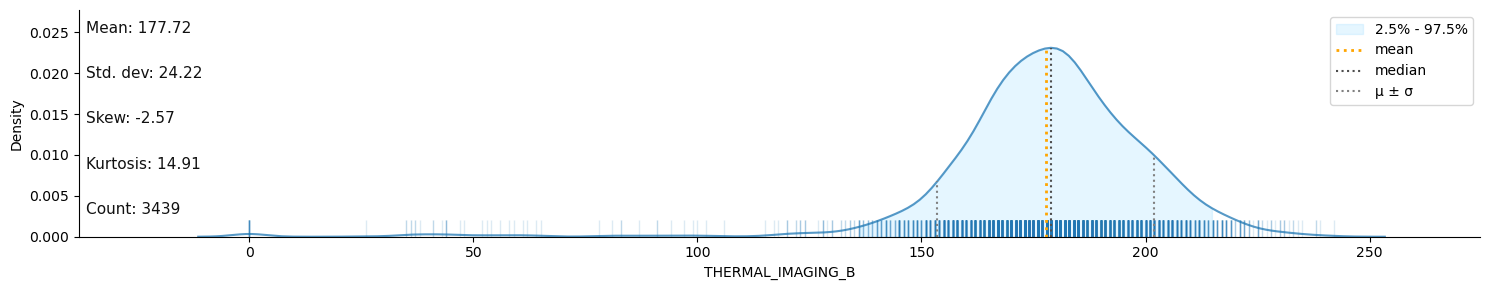

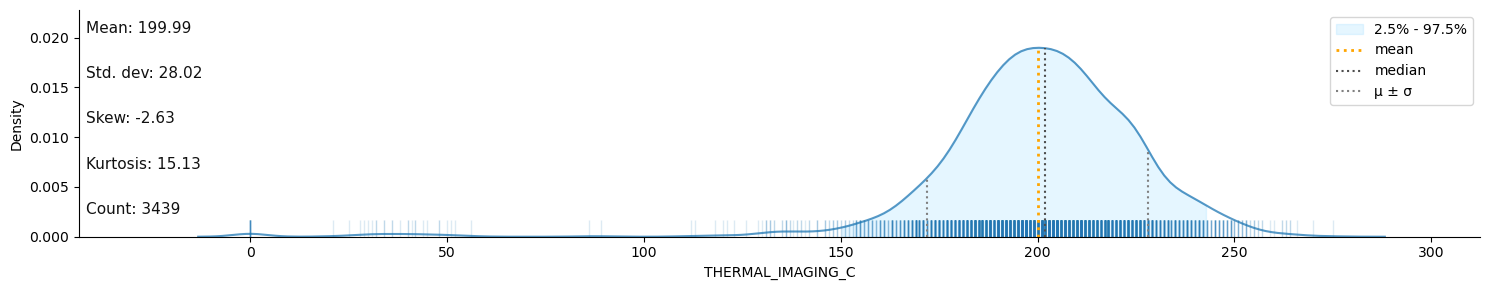

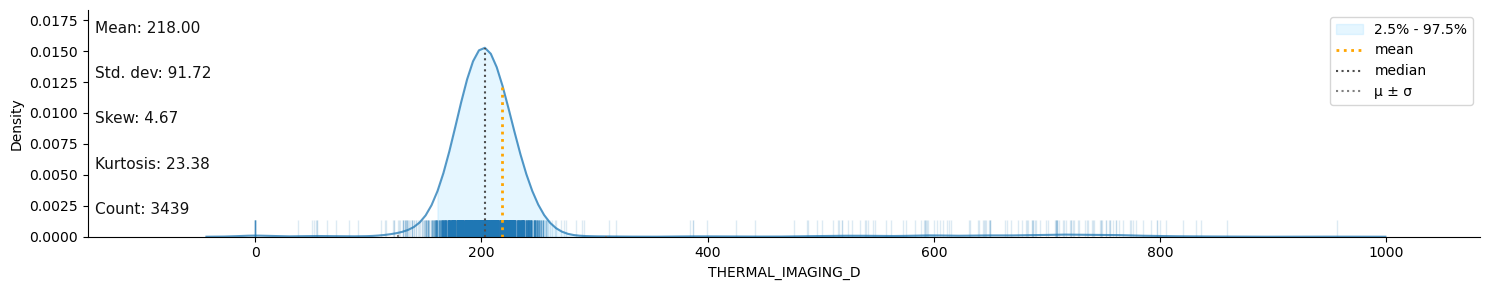

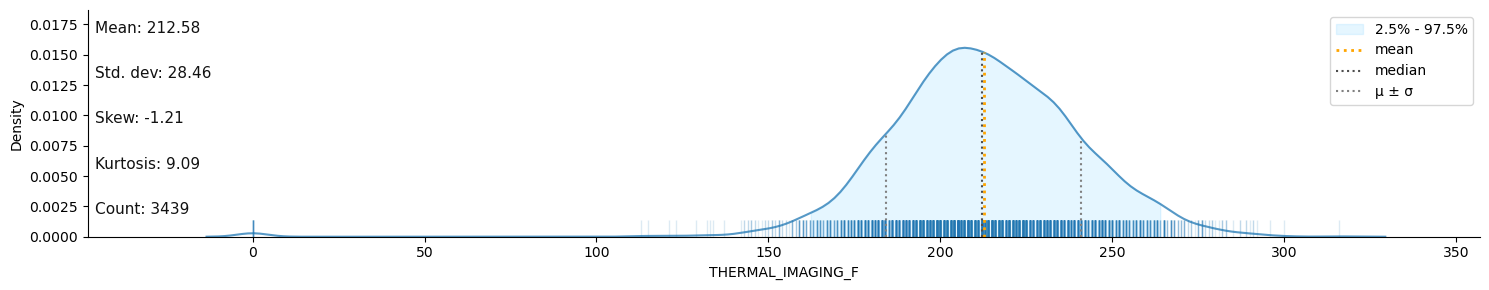

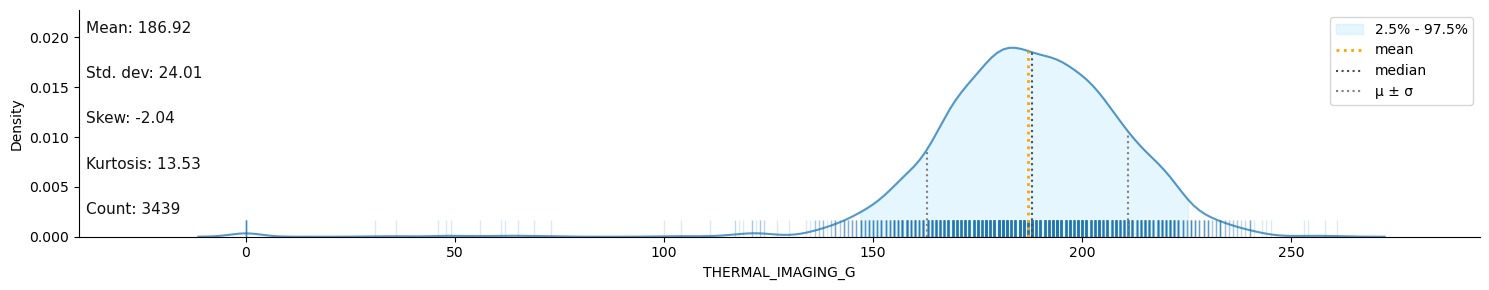

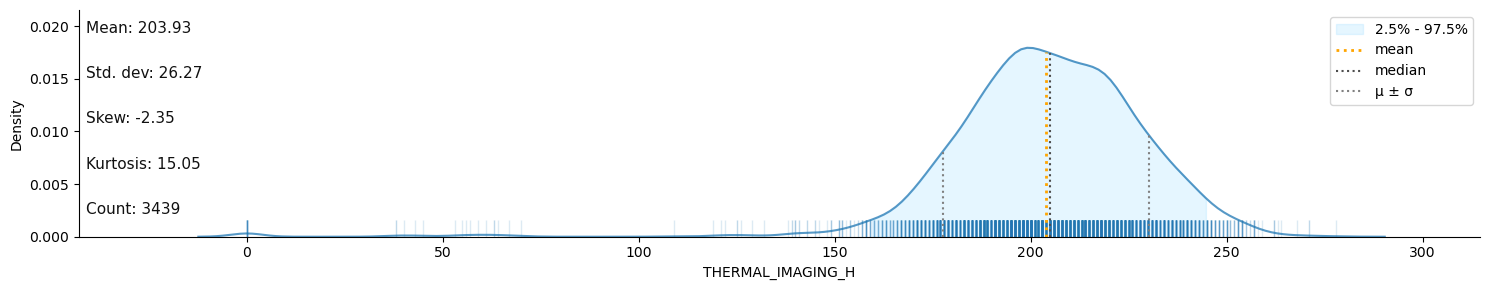

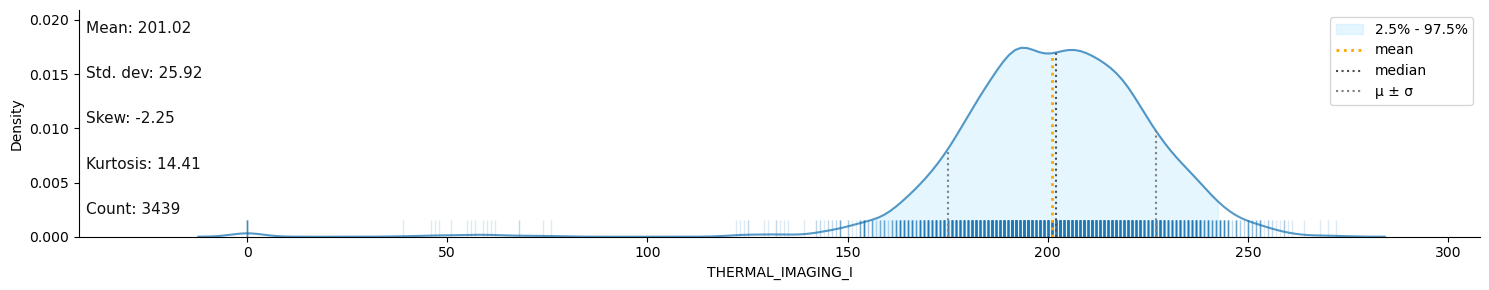

In [53]:
# Density plots

klib.dist_plot(data)

In [54]:
# Missing value plot

klib.missingval_plot(data)

No missing values found in the dataset.


In [55]:
# Cleaning data using klib

data = klib.data_cleaning(data)

Long column names detected (>25 characters). Consider renaming the following columns ['trips_on_prev_day_of_report_date', 'compliance_percent_ir_scan'].
Shape of cleaned data: (3439, 27) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 5
     of which 5 single valued.     Columns: ['days_after_last_scan', 'plan_scan_freq_days', 'compliance_percent_ir_scan', 'thermal_imaging_e', 'thermal_imaging_j']
Dropped missing values: 0
Reduced memory by at least: 0.65 MB (-65.66%)



In [56]:
# To check for columns

data.columns

Index(['tlc_no', 'tlc_start_date', 'life_on_the_day_of_report',
       'maturity_percent', 'last_scan_date', 'result',
       'trips_on_prev_day_of_report_date', 'hm_throughput_kt',
       'fill_qnty_per_trip', 'fce_circuit', 'last_tare_wt', 'last_repair_date',
       'plan_repair_freq_days', 'compliance_percent_repair', 'report_date',
       'average_temp', 'timestamp', 'seq_no', 'thermal_imaging_a',
       'thermal_imaging_b', 'thermal_imaging_c', 'thermal_imaging_d',
       'thermal_imaging_f', 'thermal_imaging_g', 'thermal_imaging_h',
       'thermal_imaging_i', 'thermal_imaging_condition'],
      dtype='object')

In [57]:
# To obtain the statistical description of the data

data.describe()

,tlc_no,maturity_percent,trips_on_prev_day_of_report_date,hm_throughput_kt,fill_qnty_per_trip,last_tare_wt,plan_repair_freq_days,compliance_percent_repair,average_temp,seq_no,thermal_imaging_a,thermal_imaging_b,thermal_imaging_c,thermal_imaging_d,thermal_imaging_f,thermal_imaging_g,thermal_imaging_h,thermal_imaging_i
count,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000,3439.000000
mean,24.604828,46.070019,2.840651,190.433228,227.544083,258.410309,7.226229,97.171852,160.426346,42649.449219,204.061935,177.719391,199.989243,218.004364,212.578079,186.917709,203.931671,201.021225
std,14.035730,27.949722,0.855579,128.771835,45.494896,47.586685,4.050201,12.147540,20.794798,2044.590088,27.498295,24.220991,28.015471,91.715042,28.463591,24.006544,26.267735,25.915510
min,1.000000,0.100000,1.000000,0.100000,79.300003,113.000000,3.000000,0.000000,0.000000,39084.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,23.000000,2.000000,89.599998,184.199997,205.000000,3.000000,100.000000,149.650002,40895.500000,189.000000,167.000000,188.000000,189.000000,196.000000,174.000000,191.000000,188.000000
50%,24.000000,45.799999,3.000000,169.000000,257.299988,290.000000,6.000000,100.000000,159.500000,42558.000000,205.000000,179.000000,202.000000,203.000000,212.000000,188.000000,205.000000,202.000000
75%,37.000000,66.599998,3.000000,275.349991,266.000000,300.000000,13.000000,100.000000,171.399994,44362.000000,220.000000,191.000000,216.000000,219.000000,231.000000,202.000000,220.000000,217.000000
max,48.000000,109.599998,6.000000,544.700012,285.700012,319.000000,16.000000,100.000000,275.899994,46272.000000,390.000000,242.000000,275.000000,956.000000,316.000000,261.000000,278.000000,272.000000


In [58]:
data.duplicated().sum()

0

In [59]:
data.dtypes

tlc_no                               float32
tlc_start_date                        string
life_on_the_day_of_report             string
maturity_percent                     float32
last_scan_date                      category
result                              category
trips_on_prev_day_of_report_date     float32
hm_throughput_kt                     float32
fill_qnty_per_trip                   float32
fce_circuit                         category
last_tare_wt                         float32
last_repair_date                      string
plan_repair_freq_days                float32
compliance_percent_repair            float32
report_date                         category
average_temp                         float32
timestamp                           category
seq_no                               float32
thermal_imaging_a                    float32
thermal_imaging_b                    float32
thermal_imaging_c                    float32
thermal_imaging_d                    float32
thermal_im

In [65]:
path = "/Users/sys1/Documents/ISH/internships/Inspire'23/DATA/Cleaned_dataset_TI_3M.csv"
with open(path, 'w', encoding = 'utf-8-sig') as file:
    data.to_csv(file) 